<div style="text-align: right"> 29.11.2019</div>

***Name: Ole Böttger*** 

# Hausaufgabe Blatt 6

## Mathematisches Pendel

In dieser Aufgabe werden wir die Bewegungsgleichung eines (mathematischen) Pendels numerisch lösen. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Um diese Gleichung numerisch lösen zu können, werden wir die gegeben Differentialgleichung zweiter Ordnung in zwei Differentialgleichungen erster Ordnung überführen:

\begin{align*}
        \dot \varphi &= \omega \tag{1}\\
        \dot \omega &= -\frac{g}{L} \sin  \varphi.  \tag{2}
\end{align*}

Bevor wir die Gleichungen (1) und (2) numerisch lösen können, müssen wir diese diskretisieren. Wie auf Aufgabenblatt 3 werden wir dazu das Euler Verfahren benutzen. Hier wird die Ableitung nach der Zeit durch kleine diskrete Änderungen in der Zeit $\Delta t$ approximiert. 

\begin{align*}
\dot \varphi &= \frac{\mathrm{d}\varphi}{\mathrm{d}t}\approx \frac{\Delta \varphi}{\Delta t} \\
\dot \omega &= \frac{\mathrm{d}\omega}{\mathrm{d}t}\approx \frac{\Delta \omega}{\Delta t} \\
\end{align*}

Umstellen der Gleichungen führt zu:
\begin{align*}
\Delta \varphi &= \omega \cdot \Delta t \\
\Delta \omega &= -\frac{g}{L} \sin  \varphi \cdot \Delta t.\\
\end{align*}

Dies sind die diskreten Änderungen im Winkel $\Delta \varphi$ und der Winkelgeschwindigkeit $\Delta \omega$ in nach einem Zeitschritt $\Delta t$.

Um also den neuen Winkel $\varphi\left(t+\Delta t\right)$ zum Zeitpunkt $t+\Delta t$ berechnen zu können, muss man lediglich die diskrete Änderung $\Delta \varphi$ auf den alten Winkel $\varphi\left(t\right)$ zum Zeitpunkt $t$ addieren (auch *update step* genannt). Gleiches gilt auch für die Winkelgeschwindigkeit $\omega$. Man erhält die nach dem Euler Verfahren diskretisierten Gleichungen:

\begin{align*}
    \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + \omega\left(t\right) \cdot \Delta t \tag{3}  \\
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{4}
\end{align*}

Wie Sie hier erkennen können, hängt die rechte Seite der obigen Gleichungen lediglich von $t$ (alter Zeitpunkt) und nicht von $t+\Delta t$ (neuer Zeitpunkt) ab.
### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (3 + 4) numerisch für $N=3000$ Zeitschritte, wobei $\Delta t=0.002$, $\omega(t=0)=0$ und $ \varphi_0 = \varphi(t=0)=\pi/4 $ sein soll. Wählen Sie für die Länge des Pendels $L=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()` (in (b)), `np.sin()`

In [63]:
import numpy as np # Bibliotheken import
import matplotlib.pyplot as plt

g = 9.81 # Konstanten definieren
L = 1
dt = 0.002
phi = np.pi/4 # Anfangswert von phi(t) definieren
om = 0 # Anfangswert von omega(t) definieren

listephi = [phi] # erschaffe Liste der phi


for i in range(2999): # Schleife
    phi = phi + om * dt # setze phi gleich nach Formel (3)
    listephi.append(phi) # schreibe phi in Liste
    om = om - g/L * np.sin(phi) * dt # setze omega gleich nach Formel (4)
    
#print(listephi) # zur Kontrolle 

**b)** Plotten Sie den Winkel des Pendels abhängig von der Zeit. Vergleichen Sie das Ergebnis mit der analytischen Lösung durch Kleinwinkelnäherung:

\begin{equation*}
\varphi\left(t\right) = \varphi_0 \cos \left( \sqrt{(g/L)} \cdot t \right).
\end{equation*}


Benutzen Sie angemessene Beschriftungen und Legenden. Was fällt Ihnen beim Vergleich auf?

*Tipp:* Benutzen Sie zum Erstellen des Zeit arrays anstelle von `np.linspace()` dieses Mal `np.arange(start, stop, width)`. Dabei wird ein array mit den Grenzen `[start, stop)` erstellt und der Abstand zwischen zwei konsekutiven Werten ist durch `width` gegeben.


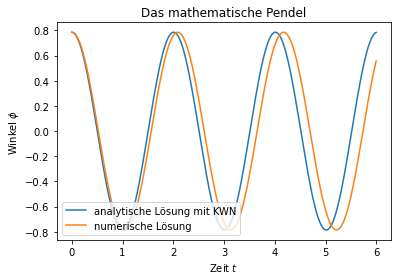

In [65]:
phi0 = np.pi/4 # Anfangswert von phi(t) definieren

t = np.arange(0, 6, 0.002) # Zeitintervall festlegen
phi_t = phi0 * np.cos(np.sqrt(g/L) * t) # def phi mit analytischer Lösung

fig, ax = plt.subplots() 

ax.set_title("Das mathematische Pendel") # Titel
ax.plot(t, phi_t, label='analytische Lösung mit KWN') # Graph
ax.plot(t, listephi, label='numerische Lösung') # Graph
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $\phi$") # Es müsste eigentlich \varphi sein, aber da meckert er immer :(
plt.legend(loc=3)

plt.show()

Mir fällt beim Vergleich auf: Die Differenz der numerischen Lösung und der analytischen Lösung wird größer, je öfter das Pendel schwingt.

**c)** Wiederholen Sie die Schritte **a)** und **b)** für $\varphi_0 = \pi/16.$ Was beobachten Sie?

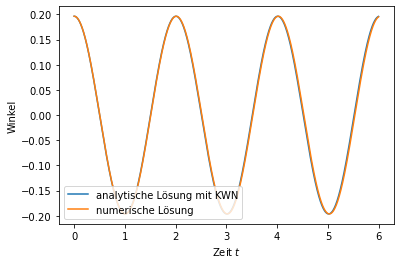

In [69]:
g = 9.81 # Konstanten definieren
L = 1
dt = 0.002
phi = np.pi/16 # Anfangswert von phi(t) diesmal als pi/16 definiert
om = 0 # Anfangswert von omega(t) definieren

listephi = [phi] # erschaffe Liste der phi

for i in range(2999): # Schleife
    phi = phi + om * dt # setze phi gleich nach Formel (3)
    listephi.append(phi) # schreibe phi in Liste
    om = om - g/L * np.sin(phi) * dt # setze omega gleich nach Formel (4)
    
phi0 = np.pi/16 # Anfangswert von phi(t) diesmal als pi/16 definiert

t = np.arange(0, 6, 0.002) # Zeitintervall festlegen
phi_t = phi0 * np.cos(np.sqrt(g/L) * t) # def phi mit analytischer Lösung

fig, ax = plt.subplots()

ax.plot(t, phi_t, label='analytische Lösung mit KWN')
ax.plot(t, listephi, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel")
plt.legend(loc=3)

plt.show()

Ich beobachte: Durch die weitaus geringere Anfangsauslenkung wird die numerische Näherung für den Verlauf der Schwingung deutlich genauer. Die blaue und die orangene Kurve sind kaum noch voneinander unterscheidbar.